In [1]:
# Utility: Preparation text

from contractions import CONTRACTION_MAP

##========== PREPARATION TEXT ===========##

# Contraction
def expand_contractions(sentence, contraction_mapping=CONTRACTION_MAP):
    """
    Expand the contractions in a sentence. For example don't => do not.
    
    Paramters:
    sentence (str): The input sentence to clean.
    contraction_mapping (dict): A dictionary for mapping contractions.
    
    
    Returns:
    str: The expanded contraction sentence.
    """
    
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())),
                                      flags=re.IGNORECASE|re.DOTALL)
    
    def expanded_match(contraction):
        """
        Filter for expanding the matched contraction.
        
        Parameters:
        contraction (str): The input of contraction
        
        Returns:
        str: The expanded contraction.
        """
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match) if contraction_mapping.get(match) else contraction_mapping.get(match.lower())
        
        expanded_contraction = first_char + expanded_contraction[1:]
        return expanded_contraction
    
    expanded_sentence = contractions_pattern.sub(expanded_match, sentence)
    return expanded_sentence


def remove_extra_spaces(sentence):
    # Use regex to replace multiple spaces with a single space
    return re.sub(r'\s+', ' ', sentence).strip()


def remove_non_ascii(text):
    """
    Remove all non-ASCII characters from the text.

    Parameters:
    text (str): The input text to clean.

    Returns:
    str: The cleaned text with only ASCII characters.
    
    """
    
    return ''.join([char for char in text if ord(char) < 128])

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import spacy

import re
import os

import ast

from tqdm import tqdm

from nltk.corpus import stopwords
import gensim

In [3]:
# Load nlp model
nlp = spacy.load('en_core_web_lg')

In [4]:
df = pd.read_csv('example.csv')

# Convert the string columns to dictionaries
df['ability'] = df['ability'].apply(ast.literal_eval)
df['ability_filtered'] = df['ability_filtered'].apply(ast.literal_eval)


print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   review            99 non-null     object
 1   ability           99 non-null     object
 2   ability_filtered  99 non-null     object
dtypes: object(3)
memory usage: 2.4+ KB
None


,review,ability,ability_filtered
0,"The staff were incredibly helpful and patient,...","{0: [('staff', 'were patient'), ('staff', 'wer...","{0: [('staff', 'were patient'), ('staff', 'wer..."
1,I had a great experience purchasing my phone h...,"{0: [('process', 'was quick'), ('process', 'wa...","{0: [('process', 'was quick')]}"
2,"Their selection of phones is amazing, and the ...","{0: [('selection', 'is amazing'), ('price', 'a...","{0: [('selection', 'is amazing')]}"
3,I appreciate how the staff walked me through s...,"{0: [('I', 'appreciate walked me'), ('I', 'app...","{0: [('I', 'appreciate walked me')]}"
4,"Great customer service, I left with the phone ...","{0: [('question', 'answered'), ('I', 'left wit...","{0: [('question', 'answered'), ('I', 'left wit..."


In [5]:
def contraction(x):
    flatten = [item for sublist in x.values() for item in sublist]

    temp = []
    for t in flatten:
        temp.append(' '.join(t))

    if len(temp) > 0:
        return '. '.join(temp) + '.'
    return ''
    
corpus = df['ability'].apply(contraction).values

corpus

array(['staff were patient. staff were helpful.',
       'process was quick. process was smooth.',
       'selection is amazing. price are competitive.',
       'I appreciate walked me. I appreciate walked through setting new device.',
       'question answered. I left with phone.',
       'I could not resist offer amazing deals on phones. I could not resist upgrading.',
       'I expected. technician fixed faster. technician fixed issue.',
       'experience really know stuff.',
       'variety was impressive. I found perfect case.', '',
       'staff was knowledgeable.', 'price were reasonable.',
       'staff really went mile.',
       'service service be Excellent. they helped find.',
       'staff was friendly. deal was friendly.',
       'I love store. buying buying be experience. fixing buying be experience.',
       'I got good deal on old phone.',
       'service are reliable. service are quick.',
       'staff was helpful in setting phone.', 'I m satisfied.',
       'staff wa

In [11]:
# Define the list of stopwords
stop_words = set(stopwords.words('english'))
    
# Preprocessing text
def preprocessing(text):
    text = remove_extra_spaces(text)
    text = expand_contractions(text)
    text = remove_non_ascii(text)

    # Get token of words
    doc = nlp(text)
    result = []
    for token in doc:
        t = token.lemma_.lower()

        if re.match(r'^[0-9\W]+$', t) or len(t) < 3 or t in stop_words:
            continue
        # If the token is adjective, noun, propn, or verb
        if token.pos_ in ['NOUN', 'PROPN']:
            result.append(t)
        elif token.pos_ in ['ADJ', 'VERB']:
            result.append(t)
        else:
            continue
    return result

# Create texts
words = [preprocessing(document) for document in corpus]
words = [item for sublist in words for item in sublist]
words

['staff',
 'patient',
 'staff',
 'helpful',
 'process',
 'quick',
 'process',
 'smooth',
 'selection',
 'amazing',
 'price',
 'competitive',
 'appreciate',
 'walk',
 'appreciate',
 'walk',
 'set',
 'new',
 'device',
 'question',
 'answer',
 'leave',
 'phone',
 'resist',
 'offer',
 'amazing',
 'deal',
 'phone',
 'resist',
 'upgrading',
 'expect',
 'technician',
 'fix',
 'technician',
 'fix',
 'issue',
 'experience',
 'know',
 'stuff',
 'variety',
 'impressive',
 'find',
 'perfect',
 'case',
 'staff',
 'knowledgeable',
 'price',
 'reasonable',
 'staff',
 'mile',
 'service',
 'service',
 'excellent',
 'help',
 'find',
 'staff',
 'friendly',
 'deal',
 'friendly',
 'love',
 'store',
 'buy',
 'buying',
 'experience',
 'fix',
 'buy',
 'experience',
 'get',
 'good',
 'deal',
 'old',
 'phone',
 'service',
 'reliable',
 'service',
 'quick',
 'staff',
 'helpful',
 'set',
 'phone',
 'satisfied',
 'staff',
 'patient',
 'question',
 'variety',
 'patient',
 'question',
 'process',
 'simple',
 'thrill

In [12]:
words_count = {}

for word in words:
    word = word.lower()
    if word in words_count:
        words_count[word] += 1
    else:
        words_count[word] = 1

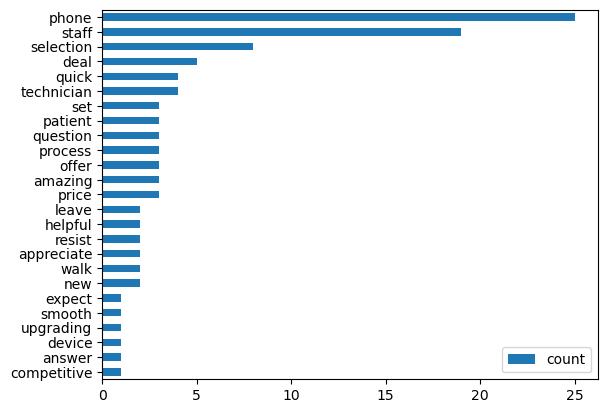

In [13]:
df_word = pd.DataFrame(data=words_count.values(),
                       index=words_count.keys(), 
                       columns=['count'])

df_word.head(25).sort_values(by='count', ascending=True).plot(kind='barh')
plt.show()

2.0


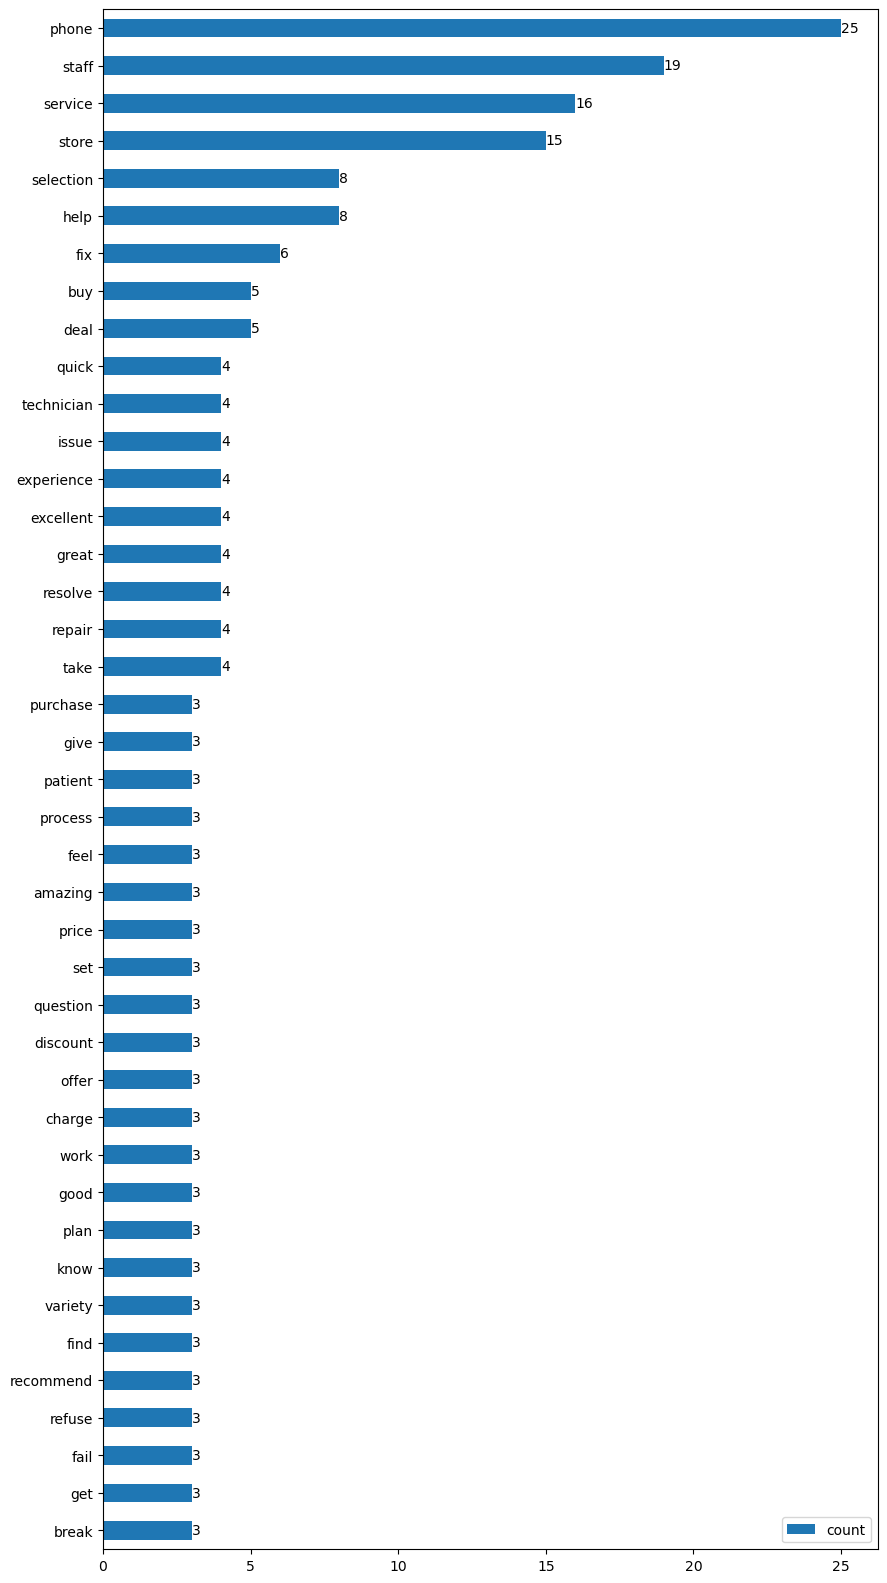

In [14]:
# Show 75% words

threshold = df_word.quantile(q=0.75).iloc[0]
# threshold = 0.25 * df_word.max().iloc[0]
# threshold = df_word.mean().iloc[0]
print(threshold)

df_plot = df_word[df_word['count'] > threshold]\
        .head(50)

ax = df_plot\
        .sort_values(by='count', ascending=True)\
        .plot(kind='barh', figsize=(10, 20))

for container in ax.containers:
    ax.bar_label(container)

plt.show()